In [47]:
import torch
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

In [48]:
from torchvision import datasets 
import torchvision.transforms as transforms

In [49]:
num_workers = 0
batch_size = 20
valid_size = 0.2

transform = transforms.ToTensor()

In [50]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [51]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler= train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler = valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

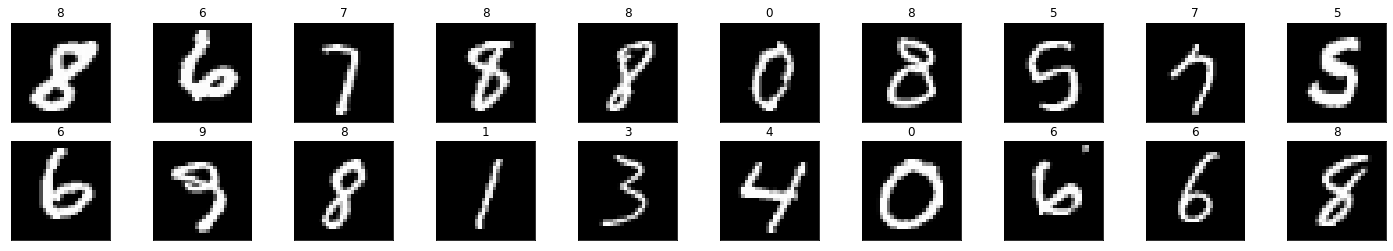

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

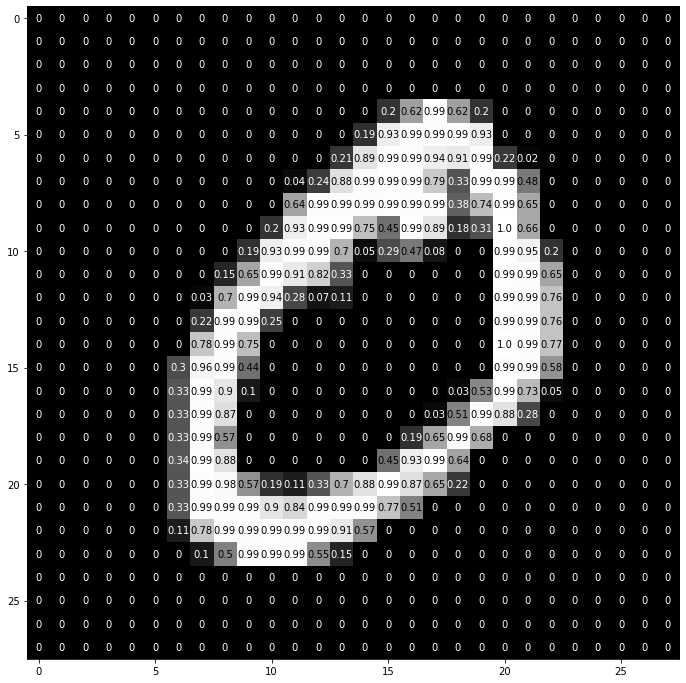

In [7]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [18]:
from torch import nn
from torch import optim
import torch.nn.functional as F

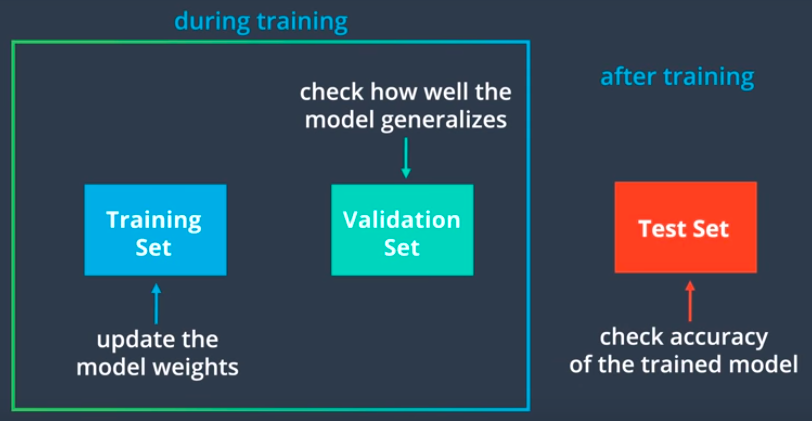

In [60]:
from IPython.display import Image
Image("Pictures/Selection_001.png")

In [22]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # linear transformation
        self.hidden_1 = nn.Linear(784, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = F.softmax(self.output(x), dim=1)
        return x
    

In [27]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [59]:
# training model
# define your loss function and optimizer

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 13
valid_loss_min = np.Inf
train_losses, test_losses, valid_losses  = [], [], []

for e in range(epochs):
    running_loss = 0.0
    valid_loss = 0.0
    for images, labels in train_loader:
        # 1. flatten the images into 784 long vector
        images = images.view(images.shape[0], -1)
        
        # 2. Clear all gradient computations
        optimizer.zero_grad()
        
        # 3. Create model for every image 
        output = model(images)
        
        # 4. Calculate loss based on label and output
        loss = criterion(output, labels)
        
        # 5. Perform backward propagation
        loss.backward()
        
        # 6. Update weights
        optimizer.step()
        
        # loss.item() gives average loss
        # we want accumulated loss, hence multiply by data_size
        running_loss += loss.item()
        
        # validate model
    model.eval()
    for images, labels in valid_loader:
        images = images.view(images.shape[0], -1)
        output = model(images)
        loss = criterion(output, labels)
        valid_loss += loss.item()

    print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Valid Loss : {:.3f}..".format(valid_loss/len(valid_loader)),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))  
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss
        

Epoch: 1/13..  Valid Loss : 0.114.. Training Loss: 0.113..  Test Loss: 0.125..  Test Accuracy: 0.963
Validation loss decreased (inf --> 68.363783).  Saving model ...
Epoch: 2/13..  Valid Loss : 0.113.. Training Loss: 0.109..  Test Loss: 0.125..  Test Accuracy: 0.963
Validation loss decreased (68.363783 --> 67.797349).  Saving model ...
Epoch: 3/13..  Valid Loss : 0.111.. Training Loss: 0.106..  Test Loss: 0.125..  Test Accuracy: 0.963
Validation loss decreased (67.797349 --> 66.522877).  Saving model ...
Epoch: 4/13..  Valid Loss : 0.110.. Training Loss: 0.103..  Test Loss: 0.125..  Test Accuracy: 0.963
Validation loss decreased (66.522877 --> 65.996353).  Saving model ...
Epoch: 5/13..  Valid Loss : 0.109.. Training Loss: 0.099..  Test Loss: 0.125..  Test Accuracy: 0.963
Validation loss decreased (65.996353 --> 65.447823).  Saving model ...
Epoch: 6/13..  Valid Loss : 0.109.. Training Loss: 0.097..  Test Loss: 0.125..  Test Accuracy: 0.963
Validation loss decreased (65.447823 --> 65.2

In [61]:
# load best validated model : when training_loss decreases and validation_loss remains the same
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [64]:
for e in range(epochs):
    
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.shape[0], -1)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)
                
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
                
    train_losses.append(running_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))
    valid_losses.append(valid_loss/len(valid_loader))
    print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)))

Epoch: 1/13..  Test Loss: 0.102.. 
Epoch: 2/13..  Test Loss: 0.102.. 
Epoch: 3/13..  Test Loss: 0.102.. 
Epoch: 4/13..  Test Loss: 0.102.. 
Epoch: 5/13..  Test Loss: 0.102.. 
Epoch: 6/13..  Test Loss: 0.102.. 


KeyboardInterrupt: 